# Week 1 Notes

## Website
- https://www.coursera.org/learn/dna-analysis/home/welcome  
- https://stepik.org/lesson/1/step/4?unit=8230 
- http://www.csbio.unc.edu/mcmillan/Comp555S16/Lecture02.html

## 1.1 The Replication Origin
- Replication begins in a genomic region called the replication origin (denoted ori) and is carried out by molecular copy machines called DNA polymerases.
- Why important?
    - E.g. gene therapy methods use genetically engineered mini-genomes, which are called viral vectors because they are able to penetrate cell walls (just like real viruses). 
    - Viral vectors carrying artificial genes have been used in agriculture, such as to engineer frost-resistant tomatoes and pesticide-resistant corn. 
    - In 1990, gene therapy was first successfully performed on humans when it saved the life of a four-year-old girl suffering from Severe Combined Immunodeficiency Disorder.


## 1.2 Hidden messages in the Replication Origin
- Initiation of replication is mediated by DnaA, a protein that binds to a short segment within the ori known as a DnaA box. 
- Hidden message: any surprisingly frequent "words" within the ori of a genome.
    - K-mer: subsequences of length k contained within a biological sequence.
- How do we know which k is the right k-mer?
    - By experiments.
    

In [305]:
def get_all_k_mer(string, k=1):
    
    length = len(string)
    
    # create a sorted list of all k-mers
    lst = [string[i: i+ k] for i in range(length-k+1)]
    lst_sorted = collections.Counter(lst).most_common()
    
    # get the highest frequency 
    if lst_sorted[0][0]:
        most_freq = lst_sorted[0][1]
   
    # return list
    mf_kmer = []
    
    # append all highest k-mers
    for item in lst_sorted: 
        if item[1] == most_freq:
            mf_kmer.append(item[0])
            
    return mf_kmer

In [336]:
#What are the most frequent 12-mers of the following sequence?
import collections
base = "TTCCCAGATTCCCAGATTCCCAGATCTGGTTATGTAGATTTTCCCAGATTCCCAGATTCCCAGAGACAGAGAGTCTGGTTATTCTGGTTATGCCTCTCGCTTCCCAGAGCCTCTCGCGCCTCTCGCGACAGAGAGGCCTCTCGCTCTGGTTATTTCCCAGATTCCCAGAGCCTCTCGCGCCTCTCGCGCCTCTCGCTTCCCAGATCTGGTTATTTCCCAGAGTAGATTGACAGAGAGGCCTCTCGCGCCTCTCGCTCTGGTTATTCTGGTTATGTAGATTGACAGAGAGTCTGGTTATTTCCCAGATTCCCAGAGCCTCTCGCTTCCCAGAGCCTCTCGCTTCCCAGAGCCTCTCGCTCTGGTTATTCTGGTTATGTAGATTGACAGAGAGTCTGGTTATGCCTCTCGCGCCTCTCGCGTAGATTTTCCCAGAGTAGATTTCTGGTTATGTAGATTTTCCCAGAGACAGAGAGTTCCCAGATCTGGTTATGTAGATTTCTGGTTATGCCTCTCGCGCCTCTCGCTTCCCAGAGACAGAGAGTTCCCAGATCTGGTTATGACAGAGAGGTAGATTGACAGAGAGGCCTCTCGCGCCTCTCGCTTCCCAGATCTGGTTATGTAGATTGACAGAGAGGCCTCTCGCGCCTCTCGCGTAGATTGACAGAGAGGCCTCTCGCGTAGATTTCTGGTTATGCCTCTCGCGACAGAGAGTTCCCAGAGTAGATTGTAGATTGTAGATTGCCTCTCGCTTCCCAGAGACAGAGAGTTCCCAGAGCCTCTCGCTTCCCAGATCTGGTTATGCCTCTCGCTCTGGTTAT"
a = get_all_k_mer(base,12)

# sort alphabetically
a.sort()
a

['CCTCTCGCGCCT',
 'CCTCTCGCTTCC',
 'CGCGCCTCTCGC',
 'CTCGCGCCTCTC',
 'CTCGCTTCCCAG',
 'CTCTCGCGCCTC',
 'CTCTCGCTTCCC',
 'GCCTCTCGCGCC',
 'GCCTCTCGCTTC',
 'TCGCGCCTCTCG',
 'TCGCTTCCCAGA',
 'TCTCGCGCCTCT',
 'TCTCGCTTCCCA']

## 1.3 Count frequencies
![countFrequency.png](image/countFrequency.png)

In [307]:
def countFreq(sequence, subseq):
    count = 0
    start = 0

    while start < len(sequence): 

        flag = str.find(sequence, subseq, start) 
  
        if flag != -1: 
            start = flag + 1
            count += 1
        else: 
            return count 

In [308]:
#Compute Count(CGCGATACGTTACATACATGATAGACCGCGCGCGATCATATCGCGATTATC, CGCG).
seq = "CGCGATACGTTACATACATGATAGACCGCGCGCGATCATATCGCGATTATC"
subs = "CGCG"

countFreq("GACCATCAAAACTGATAAACTACTTAAAAATCAGT","AAA")

6

## 1.4 Complementary Strand
- G-G
- G-C
- A-T
- T-A
![complementary%20strand.png](image/complementary%20strand.png)

In [309]:
# method 1 

seq = "GATTACA"

complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
reverse_complement = "".join(complement.get(base) for base in reversed(seq))

reverse_complement

'TGTAATC'

In [310]:
# method 2

def ReverseComplement(Pattern):
    
    _dictionary = {"A":"T",
                  "T":"A",
                  "C":"G",
                  "G":"C"}
    
    _reverseComp = ""
    
    for _i in Pattern[::-1]:
        _reverseComp = _reverseComp + _dictionary[_i]
    
    return _reverseComp

In [337]:
seq = "GATTACA"
ReverseComplement(seq)

'TGTAATC'

### Or we could also have used the Bio package.

In [312]:
#What is the reverse complement of GATTACA?
import Bio
from Bio.Seq import Seq
seq = Seq(seq)
seq.reverse_complement()

Seq('GCGGTTTACGCATACCACACTAGGCTAGCCCTGCGTAAAAAGTTGAATCAAGTG...ATG')

In [313]:
seq.transcribe()

Seq('CAUGCGAUUGUAAUCCGCUCAACCAAGUUAGACGCUUUCUUGUCACUUGCGCUC...CGC', RNAAlphabet())

In [314]:
seq.translate()


Seq('HAIVIRSTKLDAFLSLALS*ALG*AATAYSKSIRPASQIASSRRLLLLMATGAG...VNR', HasStopCodon(ExtendedIUPACProtein(), '*'))

## 1.5 Are the Subsequences all in the Ori Region?
- After finding out the most frequent k-mer (and its reverse complementary), we need ot check if the string occurs as repeats throughout the entire Vibrio cholerae genome, rather than just in the ori region.
- We don't want the k-mer to form clump in other regions because that would mean that the k-mer we found is not special to the Ori region.


In [315]:
def findall(_pattern, _seq):    
   
    i = _seq.find(_pattern)
   
    while i != -1:
        yield i
        i = _seq.find(_pattern, i+1)

In [316]:
sequence = "AGCGTGTCTTATCAGCCCTTGCGTGTCGGCTGTACTTGAAGAGGCGTGTCGCGTGTCTGCGTGTCCGCGCGTGTCGGCGTGTCGCGTGTCGCGTGTCCTGCTTCCTGAATAGCGTGTCTGCGTGTCGCGTGTCGCGTGTCTCGCGTGTCCAGCGTGTCGTAGCGTGTCCGCGTGTCGGCGTGTCATGCGTGTCAGCGTGTCCTATGGCGTGTCACCGCGTGTCCGCGTGTCAGCGTGTCGCGTGTCGCGCCTACGCGTGTCTTTGCGTGTCGGCGTGTCAGACGTCGCGTGTCTAGGGCGTGTCGCGTGTCAGCGTGTCTAAGGCGTGTCGGGCGTGTCTGTCCGCGTGTCAACGGGCGTGTCATATAATTGCCCGAGGCGTGTCGGCGTGTCGCGTGTCGCGTGTCGCGTGTCAGGCGTGTCGGCGTGTCGCGTGTCCGCGTGTCGCGTGTCTGCGTGTCGCGTGTCGGCGTGTCGCGTGTCGTTCGCGTGTCGCGTGTCGTTACATGCGTGTCGCGTGTCGGCGTGTCCATGCGTGTCCGCGTGTCGGCGTGTCTACGCGTGTCCAGGCGTGTCGCGTGTCTGGCGTGTCTAGCGTGTCGCGTGTCTTGCGTGTCTTGAGCGTGTCGCGTGTCAGTGCGTGTCAAAGGCGTGTCGCGTGTCGCGTGTCGGCGTGTCGGCGTGTCGCGTGTCCGTCAGAGGCGTGTCGCGTGTCCATTTGCGTGTCCACTAGCGTGTCGGTCGCGTGTCGCCTCGCGTGTCGGCGTGTCCGGCGTGTCAAGCGTGTCGCAGTGCGTGTCACAGCGCGTGTCATGCGTGTCATGCGTGTCCGTGCGTGTCGCGTGTCCAGCTGCGTGTCCATGCGTGTCTGCGTGTCTGGCGTGTCAAGGCGTGTCTAAAGCGTGTCACTTTGCGTGTCCGGCAGCGTGTCAGCGTGTCGAAGCGTGTCCCATAGCGTGTCGGCGTGTCGCGTGTCAGCTGGCGTGTCCTCGTTAGACGCGTGTCAGTGCGTGTCATGAGCGTGTCAAATGCGTGTCGCGTGTCCACCGCGCGTGTCACGCGTGTCTTTTGCGTGTCCGCGTGTCGGGCGTGTCAGGGGCGTGTCACTGCGTGTCTGCGTGTCTTCAGGGCGTGTCTCCTAGCCGTCGCGTGTCGGTGCGTGTCTGCGTGTCTGCGTGTCAGCGTGTCTTGCATGCGTGTCGCGTGTCGCGTGTCGCGTGTCGGAGAACGGCGTGTCCAGCGCCTACGGGCGTGTCGCGTGTCCGGCGTGTCAGCGTGTCTTGCGTGTCGCGTGTCTGCGTGTCGGGTCGCGTGTCGCGTGTCGCGTGTCACAGCGTGTCCCGCGTGTCGCGTGTCTGCGTGTCCATGAGGTAGCGTGTCGCGTGTCGTGCGTGTCGCGTGTCGCGTGTCCCCTCGCGTGTCTTCGTGGCGTGTCGCGTGTCGAACGCGTGTCACCGGCAGGGCGTGTCGCGTGTCGGCGTGTCGCGTGTCAGCGTGTCACAGCGTGTCGGAAAGGGGCGAAGGTCGCGTGTCCCTGGGCGCGTGTCGAGCGTGTCCCGCGTGTCGCGTGTCGCGTGTCCGCGTGTCAGCGTGTCCGCGTGTCAGCGTGTCGCGTGTCACGAGCGTGTCGGCGTGTCTGCTTATTGCGTGTCCGGCGTGTCTGCGTGTCTACGCGTGTCAGCGTGTCTTGCGTGTCCGGGCGCGTGTCGGCGTGTCCCGCTGATGCGTGTCGCGTGTCTCAGGCGTGTCAGCGTGTCTCCCGCGTGTCAATGGGCGACGTGCGTGTCCGATGGTTTGCGTGTCAGCGCGTGTCGTGAACTCGGCCGCTATGCGTGTCCCCCGGCGTGTCCGTAGCAGCGTGTCCAGCGTGTCGCACGCGTGTCGCTGCCTCGGCGTGTCCATTTGTGCGTGTCGGCGTGTCCAGCGTGTCGCGTGTCTGCGTGTCGTCGCGTGTCAGCGTGTCTGCGTGTCGCGTGTCCGCGTGTCGCGTGTCTCATGGCGTGTCGCGTGTCCGTAATTGCAGCCGTGCGTGTCGGGCGTGTCGCGTGTCGGAAGAGACTCGCGTGTCGTGCGCGTGTCGGCGTGTCGACGGCGTGTCGCGTGTCCAGCGTGTCGGCGTGTCGACGATGCGTGTCTTTGTGCGTGTCCGCGTGTCTGGCGTGTCAGCGTGTCGCTGCGTGTCTGCCTGCGTGTCGCGCGTGTCGCGTGTCGCGTGTCCGCGATTGACGGATTTGGCGTGTCTGGAATCGCGTGTCAGCGTGTCGGCGGAGCGTGTCGCGTGTCTTAGCGTGTCGGGCGTGTCAGCGTGTCTGCGTGTCGTTACCGCGTGTCTCAACGCGTGTCAGCGTGTCGGGCGTGTCCCCGGCGTGTCGCTGCGTGTCGCGTGTCTTGAGCGTGTCGATTTTGCGTGTCTGCGTGTCTCTACGTTGCGTGTCCAGCATCGCGTGTCTGCCGCGTGTCTGGCAGCGTGTCATGGCGTGTCGCGTGTCACCGGCAAAAGCGTGTCTAGCGTGTCCGGCCCGGCGTGTCATAGCGTGTCCGCGTGTCTGCGTGTCGGCGTGTCGCGTGTCTCAGTTTATAGCGTGTCGCGTGTCCGCGTGTCGAGCGTGTCTCGCGTGTCGCGTGTCCGTGGCGTGTCGCGTGTCGAGGTAGGCGTGTCTGGCGTGTCAGGTGGTCACTGGCGTGTCGTCTCTGCGTGTCTGCGTGTCACGCGTGTCAGCGTGTCCATGCGTGTCAACTTGCGTGTCTGCGTGTCAGTTGCGTGTCTCGGATGCGTGTCCTACTGGCGTGTCTAGCGTGTCATGAGCGCGTGTCCGCGTGTCGCGTGTCGCGAGGCGTGTCCGTGTACAGAAAGTGCGTGTCTGCGTGTCGCGTGTCGGCTAGCGTGTCGCGTGTCGTTCGTGATCATTTTGTGCGTGTCAGCGTGTCGTAGCGTGTCATCGGCTGGGTGCGTGTCGCGTGTCAACGCGTGTCCGCGTGTCAGCGTGTCGCGTGTCGCGTGTCGCGCGTGTCGCGTGTCGCGTGTCTATCGCGCGTGTCGCGTGTCGCGTGTCAACCTGTAATTGTTGCGTGTCTCACGCGTGTCGGCGCGTGTCTCCAGCGTGTCGGTGCGTGTCATTCTGTGCGCGTGTCCGGTGCTTGGCGTGTCTAGCGTGTCGCGCGTGTCATTGCGTGTCTGCCGTCGCGTGTCAATCAGCGTGTCAACGAGCGTGTCATGCGCGTGTCAGAGATTGCGTGTCTAGCGTGTCGCGTGTCCGACAGGCGTGTCAAGCGTGTCAATGGCGTGTCGGCGTGTCGCGTGTCAGCGTGTCGCGTGTCCGCGTGTCACGGGCGTGTCGCGTGTCACGCGTGTCGGCGTGTCCGCGTGTCGTTAAAAGCGTGTCCCCGGCGTGTCGGCGTGTCAAGCGTGTCCGGCGTGTCGCGTGTCAACATTGCGTGTCGAAGCGACACCGCGTGTCCCTCGCGTGTCTGCGTGTCCCTACGCGTGTCCGTGCGTGTCTGCGTGTCGCGTGTCGCGTGTCTGTACTAATGGCGTGTCTGTGCACGAATGGCGTGTCTGCGTGTCTCTAGCGTGTCCGCGTGTCGCGTGTCGCGTGTCTGCGTGTCAGCGTGTCAGCGTGTCATCTTTTGTATGGCGTGTCGCGTGTCAGCGTGTCCAAAGCGTGTCTGCGTGTCGCGTGTCATGCGTGTCCAGAGCGTGTCCAGGCGTGTCGTGGCGTGTCGCGTGTCGCGTGTCCCGCGTGTCGCGTGTCGCGTGTCATGCCCGAGCGTGTCGCGTGTCAGGCGTGTCCGGCGTGTCGCGTGTCGCGTGTCGAGCGTGTCGCGTGTCGCGTGTCGCGTGTCCCGCGTGTCAGCGTGTCCGCGTGTCGTTCCGGCGTGTCTTATGTGTGGTGCGTGTCGCGTGTCACTACGCGTGTCGGCGTGTCGCGTGTCGCGTGTCTTCTTGCGTGTCCGCGTGTCAGGCGTGTCTGCGCGTGTCTTTAGCGTGTCTGCGTGTCTCGCGTGTCTGCGTGTCGCGTGTCGGCGTGTCGCGTGTCAGGGCGTGTCTCCCAAAGTCTACTTCTGCGTGTCCACGCGTGTCATGCGTGTCTCGGGGCGTGTCGAGGGGGCGTGTCTACGCGTGTCATGCGATCTCGGTTATGCGCTGCGTGTCTCAAGGCGTGTCCTCAGCGTGTCATCCGGGGCGTGTCGGGCGTGTCCGCGTGTCTGGCGTGTCGCGTGTCGCGTGTCCCGCGTGTCTCGCGTGTCACGTGCACGCGTGTCTGCGTGTCGTGCGTGTCGCGTGTCTGCGTGTCACGGCGTGTCCGATCGCTGCGTGTCCCGCGTGTCGCGTGTCTGCGTGTCGCGTGTCTGGGCGTGTCCGGTGCGTGTCTGCGTGTCTCAGCGTGTCCTTCTGGGCGTGTCGCGTGTCGACTATGCGTGTCGCGTGTCCACGCGTGTCGGCGTGTCACAAGCGTGTCCCAGCGTGTCGAAAGAGCCGCGTGTCAGTGCGTGTCCTCGCGTGTCCTAGCGTGTCAAGCGTGTCCGCGTGTCGGGCGTGTCAGAGCGTGTCGGCAAGCGTGTCTGGGGATTGCGTGTCGCGGCGTGTCGCAAAGCGTGTCAGCTGCGTGTCGTGCGTGTCGCGTGTCCGTTGGCGTGTCGCACCGTCTGCGTGTCGAGCGTGTCGCGTGTCCGCGTGTCATAAGCGTGTCGGAAGACATAGCCCGGGCGTGTCGGGCGTGTCTCTTGGGCGTGTCTTGCGTGTCGGGCGTGTCCGCGCGTGTCCCAGCGTGTCGGCGTGTCTCGGGGATATTAGCGTGTCGCGTGTCAGTGACCTAGCGTGTCGCGGTGCGTGTCTTGTCAGCGTGTCCCGCGTGTCGGGCGTGTCGCGTGTCCTGCGTGTCGCGTGTCTTTGTAAGGCGTGTCGTCGCGTGTCGAGCGTGTCGCGTGTCGCGTGTCGTGCGTGTCGAGCGTGTCGTGCGTGTCTGCGCGTGTCTGCGTGTCTGCGTGTCGCGTGTCGCGTGTCCGGCGTGTCACGACGAAGGCGTGTCGGCGTGTCTAAGGCGTGTCTCGCGTGTCTCCGCGTGTCGAGGCGTGTCTCGCGTGTCACGCGTGTCGCGTGTCTGCGTGTCTGCGTGTCTGCGTGTCACCTGCGTGTCGGCGTGTCGCGTGTCTGGCAGCGTGTCAGCGTGTCGCGTGTCCGCGTGTCCGCGTGTCTGCGTGTCGCGTGTCATACAGGCGTGTCTGCGTGTCAAAGCTGCTGCGTGTCACAATTAGCGTGTCGGCGTGTCGGCGGAAGTTCGGCGTGTCACGCGTGTCGACGCGTGTCTCTAGGGGGTCCTGGGAAATTGCGTGTCGAAGCGTGTCGCGTGTCGCGTGTCCATCTCGGAGCGTGTCGTGAGCGTGTCGCGCGTGTCGCGTGTCGGGCGTGTCACAGGATCGCGTGTCGTGGTTAGGCGTGTCATGCGTGTCCGCGTGTCGCGTGTCGAGGCGTGTCTATAAGCGTGTCTGGGAGCGTGTCGCGTGTCTTAGGCGTGTCTGCGTGTCGTCAAAAGCGGGCGTGTCTAGGCGTTCGGGCGTGTCGCGTGTCCGCGTGTCGGCGTGTCCCGAGCGTGTCGCGTGTCACGCGTGTCGAGGGCCTCAGTCGCGTGTCAGCGTGTCGCGTGTCGTACGCGTGTCCGCGTGTCATGCGTGTCCAGCGTGTCTGCGTGTCTGCGTGTCGACTTGTATAGTGCGTGTCAAAGTGCGTGTCTGGGCGTGTCGCGTGTCGCGTGTCTACCGGGGCGGCGTGTCCCCGCGTGTCGGCGTGTCGCGTGTCTGCGTGTCTGCGTGTCGCTCCTCTGGCGTGTCCCAAGCGTGTCGGCGTGTCGGCGCGTGTCGGCGTGTCGCGTGTCGCGTGTCTGAGCGTGTCATAAGCGTGTCGCGTGTCAGAGCAAGTGCGTGTCACGCGTGTCGCGTGTCGCGTGTCCCTCAAATAAAACAAGCGTGTCGCGTGTCAGCGGCGTGTCGCGTGTCCCGCGTGTCGCGTGTCCTAAAAGCGTGTCGCGTGTCCACTGGCGTGTCGCGTGTCTGCGTGTCTAGCGTGTCAAGGGCGTGTCAGCGTGTCTCTGTGAGCGTGTCCCTAGCGTGTCGCGTGTCGCGTGTCCGCGTGTCAGCGTGTCGCGTGTCGCGTGTCGCGTGTCAAGCGTGTCGGGCGTGTCGCGTGTCTTGCGTGTCGTGCGTGTCTAAACGCGTGTCAGCGTGTCGCGTGTCGGCGTGTCATGCGTGTCGCGTGTCCGCGTGTCATCCCTCGGCGTGTCATCCAGCGTGTCGCGTGTCAATTGCACAAGCGCGTGTCATTGGGCGTGTCGGTTGATGCGTGTCCGAGCGTGTCGCCGGCGTGTCAGCGTGTCAAAGAGGCGTGTCTCCAGCGTGTCTGAAGGCGTGTCGGCGTGTCTGCTCTGTTGCGCGTGTCGCGTGTCGCTGGCGTGTCCGCGTGTCGGGCGTGTCGCGCGTGTCGGCGCGTGTCTGCGTGTCAGTACTGCGCGTGTCACACAGCGTGTCGCACGCGTGTCTGGCGTGTCGGTCCAATAGCGTGTCTGCCCTATCGCGTGTCTGCGTGTCGCGTGTCGGCGTGTCGCGTGTCGAAGCGTGTCTCATTGCGTGTCCGAGTATGCGTGTCGCGTGTCGGTATGCGTGTCACCGGCCGCGTGCGTGTCCGCGTGTCGCGCGTGTCCGCGTGTCCCTAGTGCGTGTCGCGTGTCGCGTGTCTATGGCGTGTCTGCTAAGGCGTGTCAAGAGTTAGTGCGTGTCTGCGTGTCAATGGTCTACGCGTGTCCCGCGTGTCGCGTGTCTTTGCGTGTCTCTCCTGCGTGTCGCGTGTCCGCGTGTCGTTAGAACGGCGTGTCGCGTGTCGCGTGTCGCGTGTCGCGTGTCTCCAGCATAATTAGCGTGTCTGCGTGTCTAAATGGCGTGTCCGCGTGTCTCATCGCGTGTCGCGTGTCAGCGTGTCGCGTGTCGCCAGCGTGTCATTCTCCTATCGACAGCGTGTCATGCGTGTCCTGGGACTCCATGCGTGTCGCGTGTCCGGCGTGTCTGCGTGTCAATCGCGTGTCAGGTCCGCGTGTCGTGCAGCGTGTCCAGCGTGTCTCTGCGTGTCGCATGATCGGGCGTGTCGGCGTGTCGCGTGTCTATACGGCTCCGCGTGTCGTTCAGCGTGTCGCGTGTCACGCGTGTCCTTGTGGCGTGTCGCGTGTCGCTGCGTGTCGCGTGTCGCGTGTCGCGTGTCGCGTGTCACGCGTGTCCAATAGCTACCGCTGCGTGTCCGCTGCGTGTCGGCGTGTCGCGTGTCAGACCCAGCTGACGCGTGTCGCGTGTCAGCGTGTCAGACTGTTGCGTGTCGCGTGTCCTACACGTGCGTGTCTAGCAAGCGTGTCTGCGTGTCGAGCGTGTCGCGTGTCCAGGTTGCGTGTCTAAGCGCGTGTCCGCGTGTCGGCGTGTCCGCGTGTCAAGCGTGTCCGACAATGCGTGTCGCGTGTCCGGCGTGTCCGCGTGTCATGCGTGTCGCGTGTCAGAGCGTGTCGAGCGTGTCGCGTGTCTGCGTGTCAGGGCGGGCGTGTCTAGCGTGTCGGGGCGTGTCTGCGTAGCGTGTCGCGTGTCTACGGGTACGCCCTTGCGTGTCGCGTGTCGGCGTGTCTTGGCGTGTCGCGTGTCGCGTGTCATGTGCGTGTCGTTGAAGACCTTAAGGCGTGTCAGCGTGTCGCGTGTCGCGTGTCAGCGCGTGTCCTCCCAGGCGTGTCGCGTGTCGCGTGTCTGGACAGTGCGTGTCGCGTGTCGCGTGTCGATACCTGCGTGTCGCAGATGCGTGTCACCCCCCTTATAGCGTGTCGTAGCGTGTCAATGTGCGTGTCACGTGCGTGTCAGTCGCGTGTCAGCGTGTCGCGTGTCCGCGTGTCGGCGTGTCTCAGCGTGTCCCGCGTGTCGACTCTTGCGTGTCCCACGCGTGTCCAACGCGTGTCGCGTGTCTCGCGTGTCCGCGTGTCGTGCGTGTCCTCTGCGTGTCACAAGCGTGTCAGCGTGTCGGCGTGTCGCGTGTCAAATACGCGTGTCGCAGGCGTGTCGGGGCGTGTCGCGTGTCCTGGTTGCGTGTCGTAACTTGCGTGTCACGCGTGTCTATGGCGTGTCTCATTGCGTGTCGCGTGTCGCGTGTCGCGTGTCAGCGTGTCGAAGTTGGCGTGTCGCGTGTCTAGGCGTGTCCCGCGTGTCTCGGCGTGTCTCATGCGTGTCATGCGTGTCTCCATTCGCGTGTCGCGTGTCACGCGTGTCAAGTGCTATAAGCCGCGTGTCCCAAGAAATTGCGTGTCACCTTATCGCGTGTCGCGTGTCAGCGTGTCCGCGTGTCGGGCGTGTCCGCGTGTCAGTTTCCCGAATGGGTGCGTGTCGCGTGTCGCGTGTCCGCGTGTCCGCGTTGCGTGTCAGCGTGTCCCGCACCGCGTGTCGCGTGTCGGGCGTGTCTGCTGCGTGTCCGCGTGTCCGCGTGTCTGGTGCGTGTCGCGTGTCTAGCGGACCAGCGTGTCTCGCGTGTCCCTTATAGAACTACAGCGTGTCAGGCGTGTCGCCGGTAGGCCACGGTAAGATGCGTGTCTGCGTGTCGCGTGTCTAAGAGCGTGTCGCGTGTCGCGTGTCAGCGTGTCGTCTAATAGTTAAGCGTGTCAGCGTGTCACAACAGCGTGTCAGTAGGCGTGTCTCTTGCGTGTCGCTCAAGCGTGTCGGCGTGTCCTGCGTGTCCCCATGGAAACGCCGCGTGTCGCGTGTCAGCGTGTCGCGTGTCGACAGCGTGTCTTATATGGCGTGTCCGCAGGCGTGTCAGCTGCGTGTCGGCGTGTCGCGTGTCCCGCGTGTCGGCGTGTCGCGTGTCAGGCGAGCGCGTGTCGTCGCGCGTGTCGCGTGTCCTGCGTGTCAACGCGTGTC"
pattern = "GCGTGTCGC"

data = [i for i in findall(pattern, sequence)]
' '.join([str(pos) for pos in data])

'43 76 83 119 126 232 239 297 386 393 400 424 439 454 469 487 508 569 594 621 649 656 679 701 743 781 833 962 1030 1194 1201 1208 1249 1282 1309 1316 1342 1373 1389 1396 1428 1462 1477 1558 1565 1604 1724 1865 1876 1923 1964 1979 1998 2036 2091 2165 2187 2196 2203 2269 2364 2374 2475 2556 2580 2613 2631 2815 2822 2863 2882 2949 2982 2989 2996 3005 3012 3032 3039 3150 3241 3289 3304 3330 3413 3500 3507 3577 3584 3634 3668 3715 3722 3738 3745 3767 3792 3799 3815 3822 3829 3892 3919 3926 4008 4023 4209 4216 4273 4322 4337 4397 4417 4572 4582 4614 4633 4658 4794 4817 4860 4876 4917 4924 4984 4991 5089 5139 5166 5197 5339 5346 5380 5389 5452 5493 5555 5589 5633 5734 5741 5783 5806 5859 5866 5894 5926 5933 5962 5980 5996 6016 6035 6103 6110 6133 6140 6147 6172 6217 6241 6283 6345 6426 6433 6461 6515 6575 6590 6633 6678 6708 6715 6798 6828 6859 6866 6873 6880 6948 6963 6970 7031 7110 7135 7172 7201 7208 7218 7225 7232 7239 7295 7322 7352 7404 7483 7516 7542 7603 7632 7657 7664 7712 7719 7750 

#### Exercise: Return a space-separated list of starting positions (in increasing order) where CTTGATCAT appears as a substring in the Vibrio cholerae genome.

In [317]:
pattern = "CTTGATCAT"
with open("Vibrio_cholerae.txt", "r") as f:
    _genome = f.read()
    _data  = [i for i in findall(pattern, _genome)]
    print (' '.join([str(pos) for pos in _data]))
    
f.close()

60039 98409 129189 152283 152354 152411 163207 197028 200160 357976 376771 392723 532935 600085 622755 1065555


## 1.6 Looking for hidden messages in multiple genomes
- New genomes may use a completely different hidden message
- We should try to find every k-mer that forms a clump in the genome
    - Defined a k-mer as a "clump" if it appears many times within a short interval of the genome.
    - given integers L and t, a k-mer Pattern forms an (L, t)-clump inside a (longer) string Genome if there is an interval of Genome of length L in which this k-mer appears at least t times. 


- We culd apply CountFreq to each window of length L in Genome, but the running time would be O(L2 · k · |Genome|).

- A more efficient method:
    - Similar to One Hot encoding 
    1. order all 4k k-mers lexicographically;
    2. convert them into the 4k different integers between 0 and 4k − 1;
    3. Given an integer k, we define the frequency array of a string Text as an array of length 4k, where the i-th element of the array holds the number of times that the i-th k-mer (in the lexicographic order) appears in Text (see figure below).
![one-hot.png](image/one-hot.png)

#### Exercise: Compute PatternToNumber(ATGCAA). 
![e1.5.png](image/e1.5.png)

In [318]:
_dict = {'A':0, 
         'C':1, 
         'G':2, 
         'T':3}

def PatternToNumber(pattern):
    
    number = 0
    _len = len(pattern)-1
    for i in range(_len,-1,-1):
        number += (4**i)*_dict[pattern[_len-i]]

    return number

In [319]:
PatternToNumber("CACGCATAACCGAATCCTT")

75481056095

#### Exercise: Compute NumberToPattern(5437, 7). 
Divide the final number (5437 in this case) by the base, 4,  k = 7 times, the remainders would be the original pattern:
    - 5437 / 4 = 1359 R 1
    - 1359 / 4 = 339 R 3
    - 339 / 4 = 84 R 3
    - 84 / 4 = 21 R 0
    - 21 / 4 = 5 R 1
    - 5 / 4 = 1 R 1
    - 1 / 4 = 0 R 1
So the answer would be 'CCCATTC'. We could also do this w/ Python

In [320]:
_dict2 = {0:'A', 
         1:'C', 
         2:'G', 
         3:'T'}

def NumberToPattern(num, length):
    pattern = ""
    
    while num > 0:
        div = num//4
        mod = num % 4
        pattern = _dict2[mod] + pattern
        num = div
        
    # if pattern length exceeds the number of times that the number could be divided,
    # no matter how many times we divide it, it would be 0.
    while len(pattern) < length:
            pattern = _dict2[0] + pattern
    
    return pattern

In [321]:
NumberToPattern(8095,9)

'AACTTGCTT'

### Clump Finding Problem
http://bioinformaticsalgorithms.com/data/debugdatasets/replication/ClumpFindingProblem.pdf

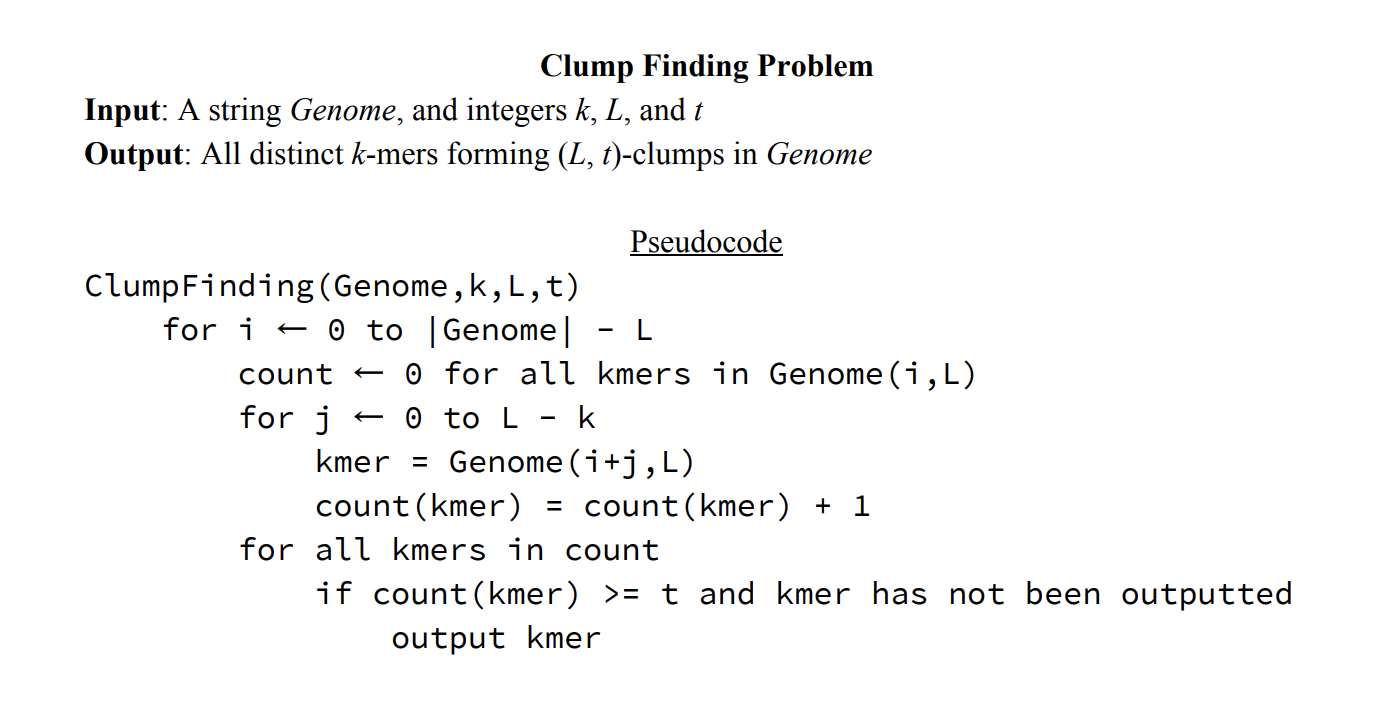

In [322]:
def kmerPositions(k, sequence):
    """ returns the position of all k-mers in sequence as a dictionary"""
    sequence = sequence.upper()
    position = {}
    for i in range(1,len(sequence)-k+1):
        kmer = sequence[i : i+k]
        position[kmer] = position.get(kmer,[])+[i]
    # combine kmers and their reverse complements
    pairPosition = {}
    for kmer in position.keys():
        # find the reverse complementary 
        krev = ''.join([{'A':'T','C':'G','G':'C','T':'A'}[base] for base in reversed(kmer)])
        # alphabetic order of kmer and krev
        if (kmer <= krev):
            pairPosition[kmer] = position[kmer] + position.get(krev,[])
        else:
            pairPosition[krev] = position[kmer]
    #print("Pair positions:\n", pairPosition)
    return pairPosition

In [323]:
def findClumps(string, k, L, t):
    
    clumps = []
    kmers = kmerPositions(k, string)
    
    for kmer, position in kmers.items():
        i = 0
        while (i <= len(position)-t):
            found = 1
            for j in range(i+1, len(position)):
                if (((position[j]+k) - position[i]) <= L):
                    found += 1
                else:
                    found += 1
            if (found >= t):
                clumps.append(kmer)
            i = j
    return clumps

In [324]:
genome = "CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA"
findClumps(genome,5,50,4)

['CGACA', 'GAAGA']

In [325]:
# How many different 9-mers form (500,3)-clumps in the E. coli genome? 
# (In other words, do not count a 9-mer more than once.)

with open("E_coli.txt", "r") as f:
    _genome = f.read()
    clumps = findClumps(_genome,9,500,3)
    uniq_c = set(clumps)
    length_c = len(clumps)
    length_u = len(uniq_c)
f.close()

In [326]:
length_c

123357

In [327]:
length_u

123357

## 1.7 A quicker Frequency Finding Algorithn
Use dynamic programming + an encoded K-mer table.\
E.g. Lexicographic order of DNA 2-mers (top), along with the index of each k-mer in this order (middle), and the frequency array for AAGCAAAGGTGGG (bottom). For example, the frequency array at index 10 is equal to 3 because GG, the tenth DNA 2-mer according to lexicographic order, occurs three times in AAGCAAAGGTGGG.
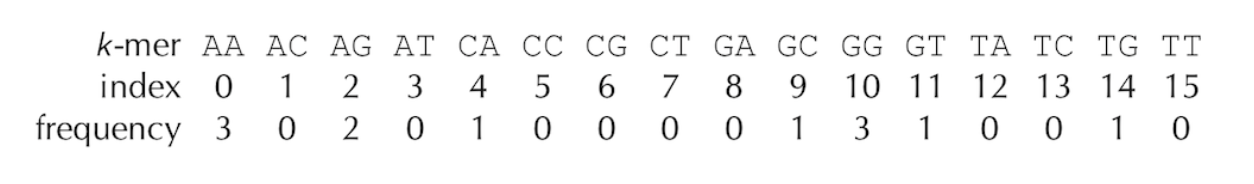

In [328]:
def ComputingFrequencies1(Text,k):
    
    _frequency_dict = {}
    for i in range(len(Text)-k):
        _frequency_dict[Text[i:i+k]] = _frequency_dict.get(Text[i:i+k],0)+1
    
    return _frequency_dict

In [329]:
ComputingFrequencies1("AAGCAAAGGTGGG",2)

{'AA': 3, 'AG': 2, 'GC': 1, 'CA': 1, 'GG': 2, 'GT': 1, 'TG': 1}

In [330]:
# A version that "encodes" the sequence to a frequency list
def ComputingFrequencies2(Text,k):
    _frequency_array = [0]*(4**k)
    for i in range(len(Text)-k+1):
        Pattern = Text[i:i+k]
        number = PatternToNumber(Pattern)
        _frequency_array[number] += 1 
    return _frequency_array


In [331]:
comptfreq_input = "AAGCAAAGGTGGG"
" ".join(str(num) for num in ComputingFrequencies2(comptfreq_input,2))

'3 0 2 0 1 0 0 0 0 1 3 1 0 0 1 0'

In [335]:
#comptfreq_input = "ATCAGGAAATAAACAGTCTTTTCGCTCTCAAGATCCTGGTTGCGTCGGCATGCTCTTAAGGCTCTGGCGTAAGGTTGAAGTGACAAAATGCTGTCCTGGCCGTCGTGCGTTTTCTGCCTGTTCAACATGCCGGTGTGGTATGTATGCAAGAAAAGTTTGGATATTTGACGGGCTCCTTCGATATGGCACGAAGGGAACTATGTCAAGAGGATTGTACGGACAAAGGACCCGTTCCAACTTGATATCTTCAGTCTTATCTCCATATACAAACCAATACCAAGATGACTTACGCTCCCTTGCATATTGGGTGTAAAGCCGAGGGGTGGATTGGGCGCGCTAGGCAGTTAACCGCCCTCATATAATCACATCCAGCACTGTTCCCTAGATGATAGGATCGCGTTCGGTGAGTTATCTTCCCACCCTTACATCGAGGCAGTAACGTTTAGCATATAAGGGTCTTTAAGACGGTTAGGAGCGAGCTAGGATGTAGTAATTCCAACCTATGGGTGGCGCCAAGTTTATAACGGACGTAGCTTAGTGATGAACACAGTCTGGTTAGTTGTGATAAACTTTTCAGGTACGGAACAGAGGCAGAACCTCTCTTTCATATATAAAGTTGACAGTGGTCGATATCCGTGGGACATTGATTGATTGGAGCGGTAGAGTCATCCTAACAGGCGCCACAAACTACCTTGAATAGTGTCACAAATATTGTAGTCAGAGGTGTAGGATAGTAGGGGAAGTGGTACAGAGAGGGATTATGAGTTTTAG"
#" ".join(str(num) for num in ComputingFrequencies2(comptfreq_input,7))